# Linear Regression

In [ ]:
#%pip uninstall -y statsmodels numpy pandas
#%pip install numpy
#%pip install pandas

# run the following block first. If it does not work, try run this block first. 

In [1]:
%pip install statsmodels
import numpy as np
import pandas as pd
import statsmodels.api as sm

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------- -------------------------- 20.5/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.4/9.9 MB 11.8 MB/s eta 0:00:01
   ---- ----------------------------------- 1.1/9.9 MB 13.6 MB/s eta 0:00:01
   ------ --------------------------------- 1.6/9.9 MB 12.8 MB/s eta 0:00:01
   -------- ------------------------------- 2.2/9.9 MB 12.5 MB/s eta 0:00:01
   ----------- ---------------------------- 2.7/9.9 MB 12.4 MB/s eta 0:00:01
   ------------- -------------------------- 3.3/9.9 MB 12.3 MB/s eta 0:00:01
   ------------- -------------------------- 3.4/9.9 MB 12.1 MB/s eta 0:00:01
   --------------- ------------------------ 3.9/9.9 MB 10.8 MB/s eta 0:00:01
   ------------------ --------------------- 4.5/9.9 MB 10.9 MB/s eta 0:00:01
   ----------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


This dataset is the one used in class 5.

In [2]:
df= pd.read_csv("5_realtor_data.csv") 
df.head()

,Home Type,Zip,Listing Price,Baths,Beds,SQFT,Year Built,Airbnb Cash on Cash
0,Single Family Residential,61822,685000,5.0,3,2840.0,2010.0,0.834059
1,Single Family Residential,61822,349900,3.0,4,1926.0,2016.0,1.349840
2,Townhouse,61822,194900,3.0,3,1600.0,2017.0,8.629820
3,Single Family Residential,61820,126900,2.0,3,1330.0,1959.0,14.517200
4,Single Family Residential,61822,369900,4.0,4,2336.0,2006.0,1.116810


In [3]:
df.describe()


,Zip,Listing Price,Baths,Beds,SQFT,Year Built,Airbnb Cash on Cash
count,296.000000,296.000000,294.000000,296.000000,294.000000,273.000000,296.000000
mean,61821.304054,225782.037162,1.969388,3.175676,2002.656463,1979.472527,7.371624
std,0.742500,147640.909051,1.434252,0.705583,994.326109,30.089697,6.247464
min,61820.000000,77100.000000,0.000000,1.000000,704.000000,1855.000000,-1.125820
25%,61821.000000,119999.750000,1.000000,3.000000,1322.500000,1960.000000,2.284272
50%,61821.000000,172350.000000,2.000000,3.000000,1704.000000,1985.000000,5.056220
75%,61822.000000,285675.000000,3.000000,4.000000,2396.000000,2004.000000,12.357400
max,61822.000000,989000.000000,6.000000,4.000000,7040.000000,2017.000000,25.179400


<Axes: xlabel='SQFT', ylabel='Airbnb Cash on Cash'>

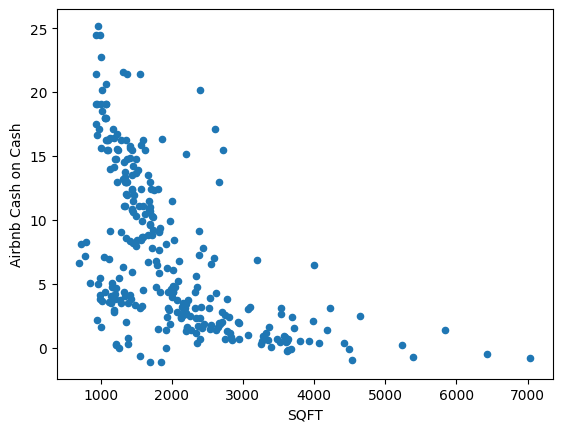

In [4]:
df.plot(kind='scatter', y='Airbnb Cash on Cash', x='SQFT')

<Axes: xlabel='Listing Price', ylabel='Airbnb Cash on Cash'>

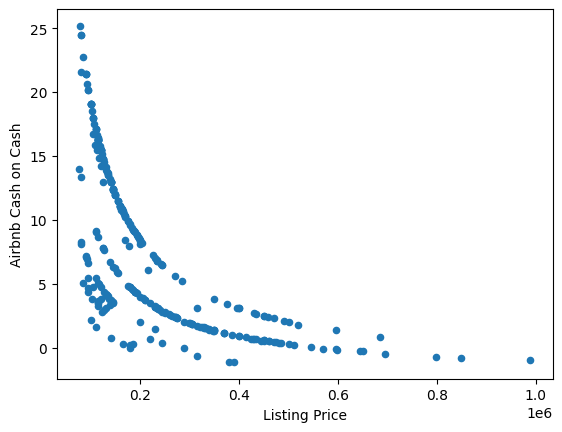

In [5]:
df.plot(kind='scatter', y='Airbnb Cash on Cash', x='Listing Price')

In [6]:
# seaborn library has a function that can be used to draw scatter plot with regression line

#%pip install seaborn
import seaborn as sns



<Axes: xlabel='SQFT', ylabel='Airbnb Cash on Cash'>

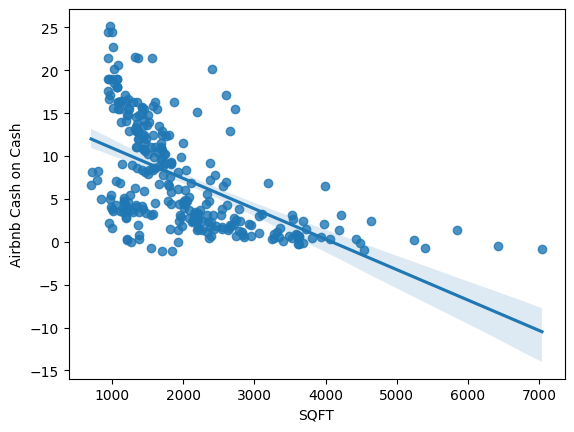

In [7]:
# Create scatter plot with regression line
sns.regplot(data=df, x='SQFT', y='Airbnb Cash on Cash')

<Axes: xlabel='Listing Price', ylabel='Airbnb Cash on Cash'>

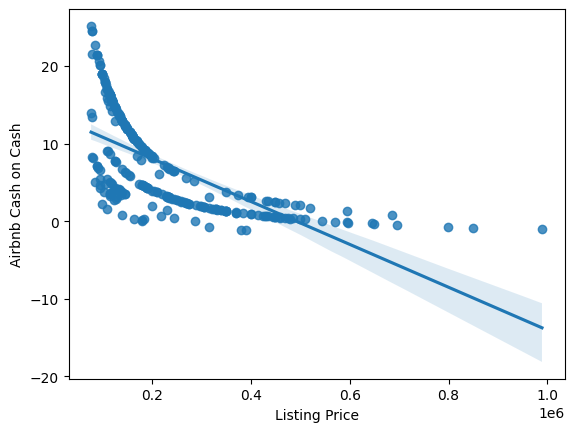

In [8]:
sns.regplot(data=df, x='Listing Price', y='Airbnb Cash on Cash')

In [9]:


# Drop missing values from all columns
df_clean = df.dropna()

# Prepare the X variables (add constant for intercept)
X = df_clean[['SQFT', 'Listing Price','Beds']]  # includes both predictors
X = sm.add_constant(X)  # Adds a constant term 

# Prepare y
y = df_clean['Airbnb Cash on Cash']

# Perform multiple regression
model = sm.OLS(y, X).fit()

# Print results
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Airbnb Cash on Cash   R-squared:                       0.447
Model:                             OLS   Adj. R-squared:                  0.441
Method:                  Least Squares   F-statistic:                     71.96
Date:                 Mon, 17 Feb 2025   Prob (F-statistic):           3.88e-34
Time:                         16:06:45   Log-Likelihood:                -797.05
No. Observations:                  271   AIC:                             1602.
Df Residuals:                      267   BIC:                             1617.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.2458      1.315 

In [ ]:
# practice: use the same dataset , run a differnt regression and printout the results

In [5]:
# Drop missing values from all columns
df_clean = df.dropna()

# Prepare the X variables (add constant for intercept)
X = df_clean[['SQFT', 'Zip','Beds']]  # includes both predictors
X = sm.add_constant(X)  # Adds a constant term 

# Prepare y
y = df_clean['Listing Price']

# Perform multiple regression
model = sm.OLS(y, X).fit()

# Print results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Listing Price   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     225.5
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           7.07e-73
Time:                        17:47:55   Log-Likelihood:                -3440.7
No. Observations:                 271   AIC:                             6889.
Df Residuals:                     267   BIC:                             6904.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.315e+08   4.36e+08     -1.450      0.1